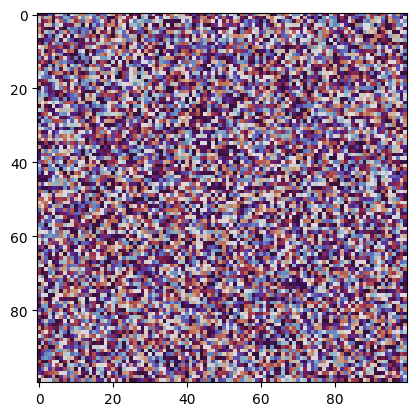

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numba import njit, prange

# Constants
N = 100  # Size of lattice nxn
K = 1.0  # Average coupling constant

# Initialize the angles and frequencies
angles = 2 * np.pi * np.random.rand(N, N)
frequencies = np.random.randn(N, N)

@njit
def get_coupling(r, coupling_type):
    if coupling_type == 1:  # uniform
        return K
    elif coupling_type == 2:  # one_over_r
        return K / (r + 1e-10)
    elif coupling_type == 3:  # one_over_r_squared
        return K / (r**2 + 1e-10)
    elif coupling_type == 4:  # nearest_neighbor
        return K if r < 1.1 else 0
    else:
        return 0

@njit(parallel=True)
def kuramoto_dtheta_dt(angles, frequencies, coupling_type):
    N, _ = angles.shape
    dtheta = np.zeros_like(angles)
    for i in prange(N):  # Replace this loop with prange
        for j in prange(N):  # And this loop as well
            sum_term = 0.0
            for x in range(N):
                for y in range(N):
                    r = np.sqrt((x - i)**2 + (y - j)**2)
                    sum_term += get_coupling(r, coupling_type) * np.sin(angles[x, y] - angles[i, j])
            dtheta[i, j] = frequencies[i, j] + sum_term
    return dtheta

# Pre-compute the simulation data
NUM_FRAMES = 200
angles_list = [angles.copy()]
for _ in range(NUM_FRAMES):
    dt = 0.01
    dtheta = kuramoto_dtheta_dt(angles, frequencies, 1)  # 1 corresponds to "uniform" coupling
    angles += dt * dtheta
    angles_list.append(angles.copy())

# Now, animate the stored angles
def update(frame):
    im.set_array(angles_list[frame])
    return im,

fig, ax = plt.subplots()
im = ax.imshow(angles_list[0], cmap='twilight_shifted', animated=True)

ani = animation.FuncAnimation(fig, update, frames=NUM_FRAMES, interval=50, blit=True)
plt.show()